---

# Linear Regression with Scikit-learn

---

-- For more information on this code, watch the video lecture(s) --

In this notebook we will explore linear regression using Scikit-learn, a popular machine learning library. This time we will be using a real dataset that we will explore and analyze.

#### Imports and Setup

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [166]:
# Optionally mount Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

## 1. Data Exploration and Analysis 

---

#### Loading the Dataset

In [167]:
# Dataset from Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview
# We are only using the training dataset from Kaggle

cols = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 
        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'YrSold', 'SalePrice']

file_path = '../content/drive/MyDrive/Udemy/Courses/Machine Learning Basics/datasets/housing_data.csv' # Change this if needed
data = pd.read_csv(file_path, usecols=cols)
data.shape

(1460, 10)

In [168]:
data.dropna(inplace=True)
data.shape

(1201, 10)

In [169]:
data.head(10)

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,YrSold,SalePrice
0,65.0,8450,7,2003,856,856,854,1710,2008,208500
1,80.0,9600,6,1976,1262,1262,0,1262,2007,181500
2,68.0,11250,7,2001,920,920,866,1786,2008,223500
3,60.0,9550,7,1915,756,961,756,1717,2006,140000
4,84.0,14260,8,2000,1145,1145,1053,2198,2008,250000
5,85.0,14115,5,1993,796,796,566,1362,2009,143000
6,75.0,10084,8,2004,1686,1694,0,1694,2007,307000
8,51.0,6120,7,1931,952,1022,752,1774,2008,129900
9,50.0,7420,5,1939,991,1077,0,1077,2008,118000
10,70.0,11200,5,1965,1040,1040,0,1040,2008,129500


In [170]:
data.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,YrSold,SalePrice
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,70.049958,9951.698585,6.122398,1970.580350,1059.384679,1158.437968,346.073272,1511.132390,2007.802664,180770.480433
std,24.284752,7924.353975,1.419216,31.750335,448.307125,386.257235,435.143451,529.928171,1.330486,83389.519866
min,21.000000,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,334.000000,2006.000000,34900.000000
25%,59.000000,7420.000000,5.000000,1950.000000,784.000000,876.000000,0.000000,1134.000000,2007.000000,127500.000000
50%,69.000000,9262.000000,6.000000,1972.000000,990.000000,1082.000000,0.000000,1456.000000,2008.000000,159500.000000
75%,80.000000,11249.000000,7.000000,2003.000000,1309.000000,1383.000000,728.000000,1768.000000,2009.000000,213500.000000
max,313.000000,215245.000000,10.000000,2010.000000,6110.000000,4692.000000,2065.000000,5642.000000,2010.000000,755000.000000


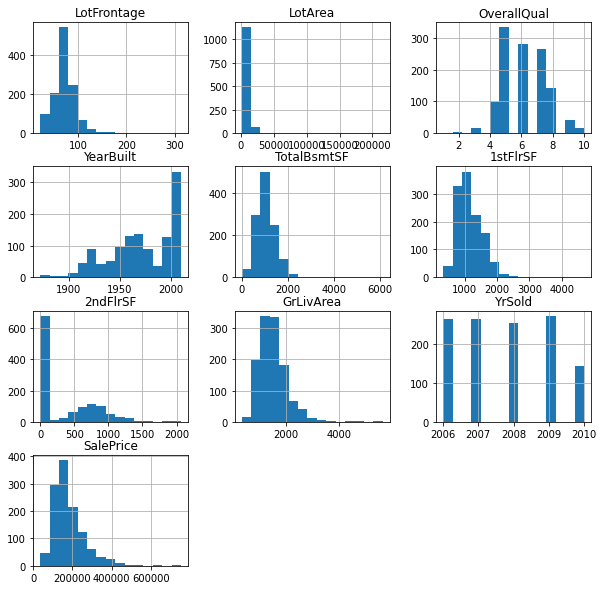

In [171]:
hist = data.hist(figsize=(10,10), bins=15)

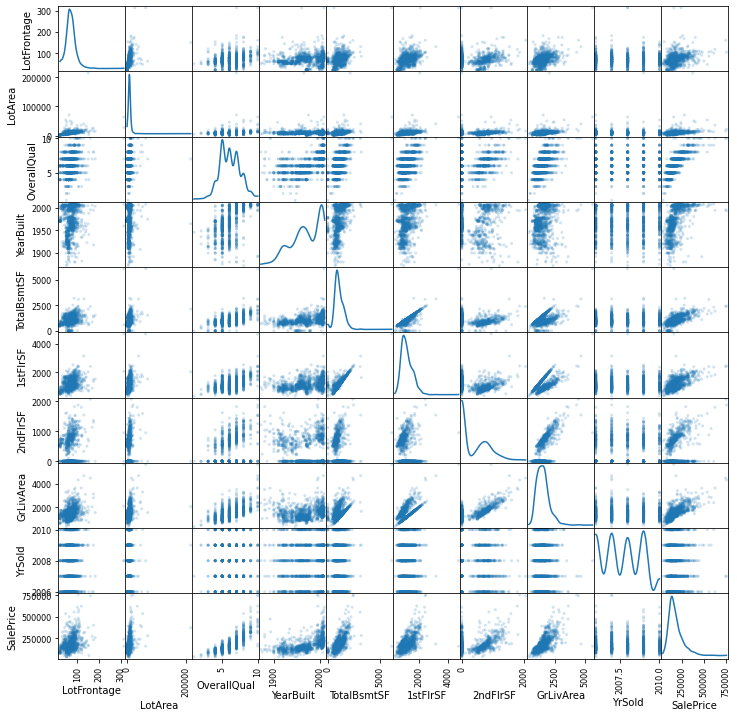

In [172]:
scat_mat = pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal="kde")

Text(0.5, 1.0, 'Corelation Matrix')

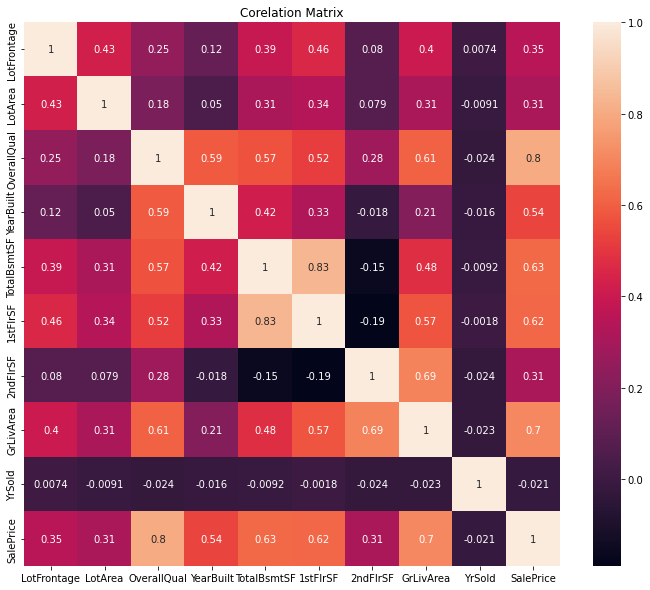

In [173]:
plt.figure(figsize=(12, 10))
corr_map = sns.heatmap(data.corr(), annot=True)
corr_map.set_title('Corelation Matrix')

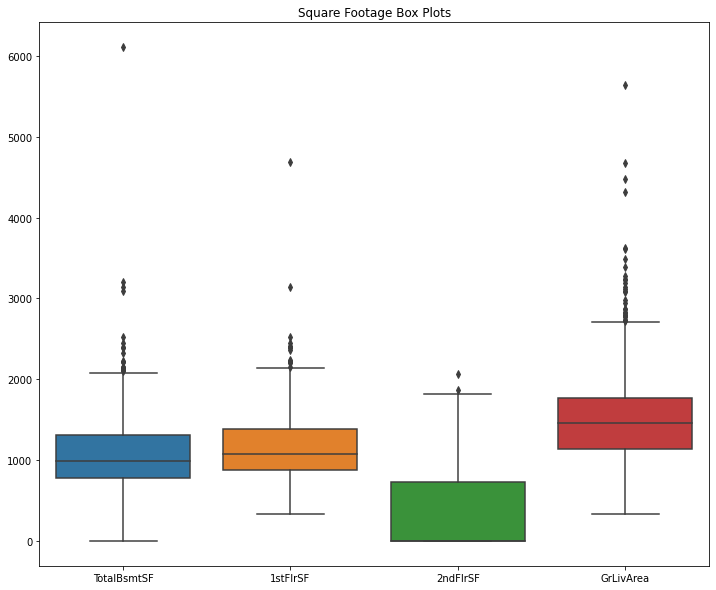

In [174]:
plt.figure(figsize=(12, 10))
plt.title('Square Footage Box Plots')
sns.boxplot(data=data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']])

In [175]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print('Training Data Shapes:\n' + 15*'-' + '\n\tX_train:', X_train.shape, '\n\ty_train:', y_train.shape, end='\n\n')
print('Testing Data Shapes:\n' + 15*'-' + '\n\tX_test:', X_test.shape, '\n\ty_test:', y_test.shape)

Training Data Shapes:
---------------
	X_train: (804, 9) 
	y_train: (804,)

Testing Data Shapes:
---------------
	X_test: (397, 9) 
	y_test: (397,)


---

## 2. Linear Regression

---

#### Define and Fit the Linear Regression Model

Creating and fitting/training a linear regression model using Scikit-learn is easy. Just two lines!

- You can even write it in a single line as `linreg = LinearRegression().fit(X_train, y_train)` since the `fit` method returns the `LinearRegression` object instance.

In [176]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Lets take a look at the coefficents of the linear regression model.
coefficents = pd.DataFrame(np.insert(linreg.coef_, 0, linreg.intercept_), columns=['Coefficients'])
coefficents.index = ['w_' + str(i) for i in range(len(coefficents))]
coefficents

,Coefficients
w_0,1.087108e+06
w_1,1.665922e+02
w_2,9.474457e-01
w_3,2.212899e+04
w_4,3.858835e+02
w_5,3.280859e+01
w_6,1.315350e+02
w_7,1.295721e+02
w_8,-7.287286e+01
w_9,-9.686927e+02


#### Use the Fit Model to Make a Prediction on the Testing Data

Now that the model is fit/trained, let's use it to predict the house prices for samples in the testing dataset.

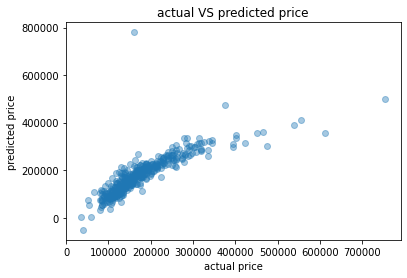

In [177]:
y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.title('actual VS predicted price')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

#### Metrics

In [178]:
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print('Training Data Metrics:\n' + 25*'-')
print('\tMean Squared Error: $%.2f' % mse_train)
print('\tMean Absolute Error: $%.2f' % mae_train)
print('\tr2 Score: %.2f' % r2_train, '\n\n')

print('Testing Data Metrics:\n' + 25*'-')
print('\tMean Squared Error: $%.2f' % mse_test)
print('\tMean Absolute Error: $%.2f' % mae_test)
print('\tr2 Score: %.2f' % r2_test)

Training Data Metrics:
-------------------------
	Mean Squared Error: $1397346876.18
	Mean Absolute Error: $25191.35
	r2 Score: 0.80 


Testing Data Metrics:
-------------------------
	Mean Squared Error: $2316003688.09
	Mean Absolute Error: $25569.00
	r2 Score: 0.68


In [179]:
compare = pd.DataFrame({'actual price':y_test, 'predicted price': np.round(y_pred).astype(int), 
                        'absolute error': np.round(abs(y_test-y_pred)).astype(int)})
compare.head(15)

,actual price,predicted price,absolute error
0,185000,181856,3144
1,402861,349084,53777
2,95000,104632,9632
3,171000,179403,8403
4,106250,58627,47623
5,185900,205204,19304
6,118500,99987,18513
7,144000,117560,26440
8,159000,151798,7202
9,140000,138102,1898


In [180]:
compare[['absolute error']].describe()

,absolute error
count,397.000000
mean,25568.994962
std,40821.918264
min,28.000000
25%,8008.000000
50%,17203.000000
75%,29501.000000
max,620358.000000


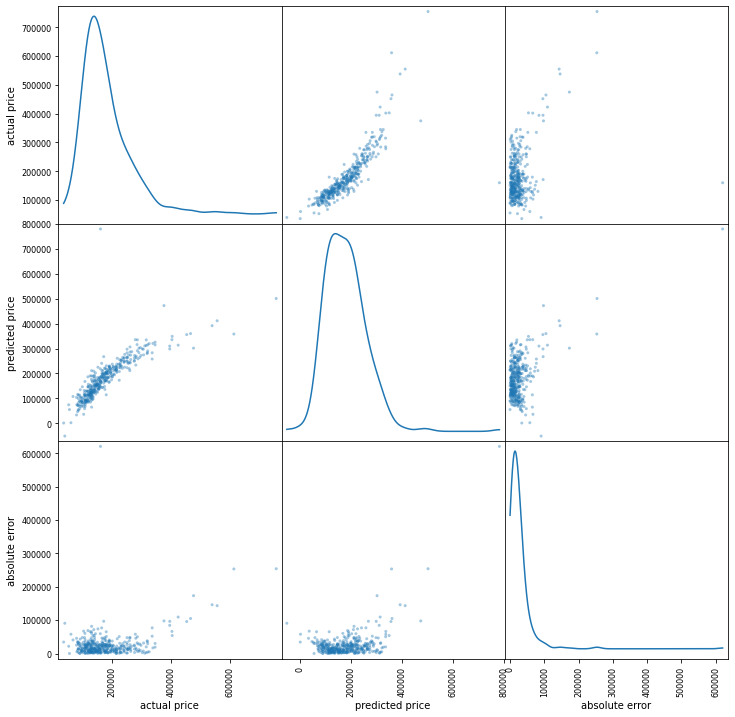

In [181]:
scatter = pd.plotting.scatter_matrix(compare, alpha=0.4, figsize=(12, 12), diagonal="kde")

---

## 3. Polynomial Regression

---

Sk-learn does not provide an explicit polynomial regression model. So, just like with our numpy implimentation, we will create the polynomial features first, then use a standard linear regression model on these new polynomial features.

#### Generate Polynomial Features
Here we generate all the interactions between the features up to a certain degree. Unlike our previous NumPy implimentation, Scikit-learn's PolynomialFeatures class accepts data with multiple features.

In [182]:
degree = 8 # Degree of the polynomial, try using degree 2, then degree 8 and observing the training and testing metrics for each.
poly_feat = PolynomialFeatures(degree, include_bias=False)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.fit_transform(X_test)

print('X_train shape:', X_train.shape)
print('X_train_poly shape:', X_train_poly.shape)

X_train shape: (804, 9)
X_train_poly shape: (804, 24309)


###### So whats up with the difference in shape?

In `X_train` we have $804$ samples with $9$ features. Say we create the polynomial features for a degree 2 polynomial. Then we will add an aditional feature for each combination of 2 of the original features. We start with $9$ features, then add each combination of two features (an aditional ${9 \choose 2} = 36$), then each feature squared (an aditional $9$). Thus in `x_tain_poly` we will have 804 samples with a total $2(9) + 36 = 54$ features.

In general, to generate the polynomial features for degree $d$ with $n$ features we have $$ p_{size}(n, d) = {n+d \choose d} = \cfrac{(n+d)!}{d!\cdot n!} .$$ So the size of the features will grow very fast if either n or d increases.

#### Define and Fit the Polynomial Regression Model

This will be the exact same as for standard linear regression but will fit on the `X_train_poly` features instead.

In [183]:
polyreg = LinearRegression()
polyreg.fit(X_train_poly, y_train)

LinearRegression()

#### Metrics

In [184]:
y_pred_train_poly = polyreg.predict(X_train_poly)
y_pred_poly = polyreg.predict(X_test_poly)

mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mae_train_poly = mean_absolute_error(y_train, y_pred_train_poly)

mse_test_poly = mean_squared_error(y_test, y_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_pred_poly)

print('Training Data Metrics:\n' + 25*'-')
print('Mean Squared Error: $%.2f' % mse_train_poly)
print('Mean Absolute Error: $%.2f' % mae_train_poly, '\n\n')

print('Training Data Metrics:\n' + 25*'-')
print('Mean Squared Error: $%.2f' % mse_test_poly)
print('Mean Absolute Error: $%.2f' % mae_test_poly)

Training Data Metrics:
-------------------------
Mean Squared Error: $222111232.86
Mean Absolute Error: $9988.58 


Training Data Metrics:
-------------------------
Mean Squared Error: $3052551174001442271111793344512.00
Mean Absolute Error: $87742804780642.88


In [185]:
compare_poly = pd.DataFrame({'actual price':y_test, 'predicted price': np.round(y_pred_poly).astype(int), 
                        'absolute error': np.round(abs(y_test-y_pred_poly)).astype(int)})
compare_poly.head(15)

,actual price,predicted price,absolute error
0,185000,80594017,80409017
1,402861,486851,83990
2,95000,165439,70439
3,171000,132387,38613
4,106250,101902,4348
5,185900,185603,297
6,118500,121344,2844
7,144000,140781,3219
8,159000,103047,55953
9,140000,105039,34961


In [186]:
compare_poly[['absolute error']].describe()

,absolute error
count,3.970000e+02
mean,8.774280e+13
std,1.747152e+15
min,1.000000e+00
25%,1.135200e+04
50%,3.010100e+04
75%,1.125270e+05
max,3.481181e+16
